<a href="https://colab.research.google.com/github/Madukaife/AI-for-CyberSecurity/blob/main/IDPS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length  \
0            31225             17616     ICMP            503   
1            17245 

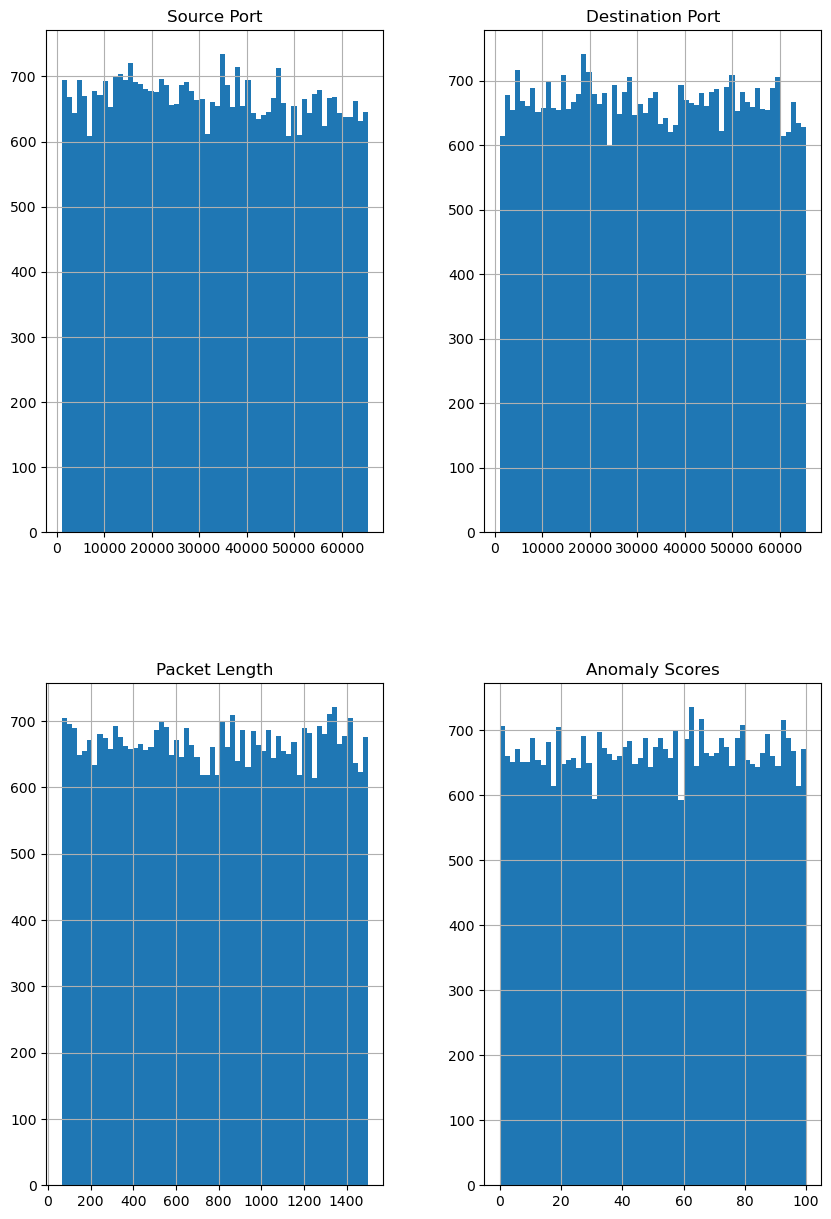

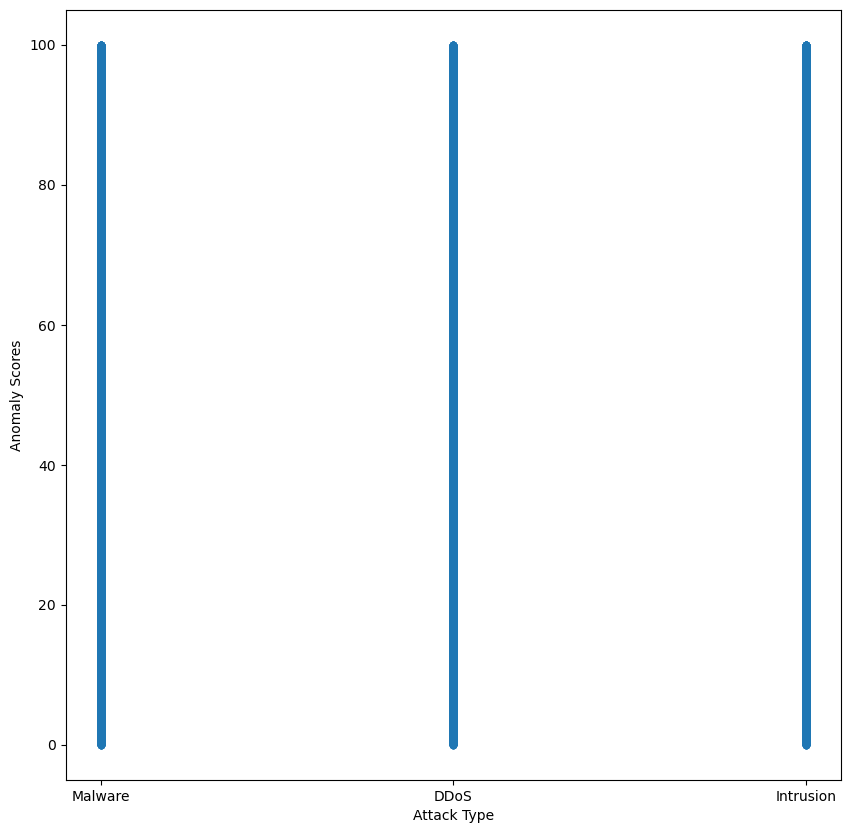

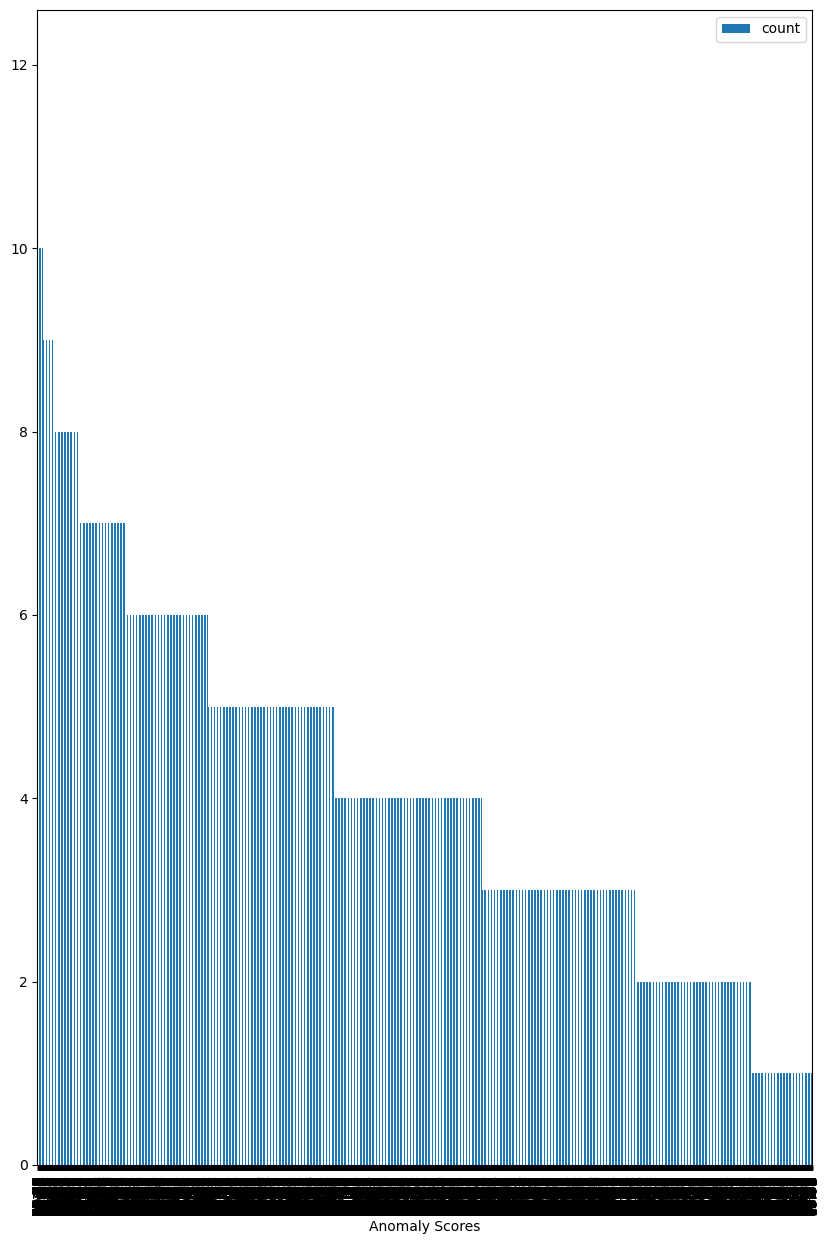

In [ ]:
import pandas as pd

# DATA EXPLORATION

# pd.set_option('display.max_columns', 25)
# pd.set_option('display.max_rows', 5)
cyber_sec = pd.read_csv('cybersecurity_attacks.csv')
col = cyber_sec.columns

cyber_sec_subset = cyber_sec[['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
        'Severity Level',
        'Network Segment',
        'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']]

null_values = cyber_sec_subset.isna()
null_values_sum = cyber_sec_subset.isna().sum()
# change_from_fillna = cyber_sec_subset['Malware Indicators'].fillna('Not Applicable')

show_null = cyber_sec_subset[cyber_sec_subset['Malware Indicators'].isna()] #whenever you want to pick a particular column
describe = cyber_sec_subset.describe()
types = cyber_sec_subset.dtypes
TC_UDP = ((cyber_sec_subset['Protocol'] == 'UDP') | (cyber_sec_subset['Protocol'] == 'TCP'))

histogram = cyber_sec_subset.hist(bins= 60, figsize=(10, 15))

mask = (cyber_sec_subset['Attack Type'] =='Malware')
cyber_sec_subset.loc[mask,'Malware Indicators'] = cyber_sec_subset.loc[mask,'Malware Indicators'].fillna('Not Detected')
cyber_sec_subset[cyber_sec_subset['Attack Type'] =='Malware']

mask = ((cyber_sec_subset['Attack Type'] =='DDoS') |(cyber_sec_subset['Attack Type'] =='Intrusion') )
cyber_sec_subset.loc[mask,'Malware Indicators'] = cyber_sec_subset.loc[mask,'Malware Indicators'].fillna('Not Applicable')
cyber_sec_subset[cyber_sec_subset['Attack Type'] =='Intrusion']

mask = ((cyber_sec_subset['Severity Level'] == 'Low')|(cyber_sec_subset['Severity Level'] == 'Medium')| (cyber_sec_subset['Severity Level'] == 'High'))
cyber_sec_subset = cyber_sec_subset.reset_index(drop=True)  # Resetting the index
cyber_sec_subset.loc[mask, 'Alerts/Warnings'] = cyber_sec_subset.loc[mask, 'Alerts/Warnings'].fillna('Not Triggered')
result_low_severity = cyber_sec_subset[mask]

cyber_sec_subset['IDS/IPS Alerts'] = cyber_sec_subset['IDS/IPS Alerts'].fillna('none')
cyber_sec_subset['Firewall Logs'] = cyber_sec_subset['Firewall Logs'].fillna('none')


attack_severity_High = cyber_sec_subset[cyber_sec_subset['Severity Level']=='High']
attack_severity_Low_Medium = cyber_sec_subset[(cyber_sec_subset['Severity Level']=='Low')|(cyber_sec_subset['Severity Level']=='Medium')]
attack_severity_Low_Medium.groupby('Attack Type')['Anomaly Scores'].mean()
attack_severity_Low_Medium.groupby('Severity Level')['Anomaly Scores'].describe()

anomaly = cyber_sec_subset[cyber_sec_subset['Anomaly Scores'] >= 0]
pd.set_option('display.max_columns', 18)
anom_plot = anomaly[['Attack Type', 'Anomaly Scores']].plot(kind='scatter', x= 'Attack Type', y='Anomaly Scores', figsize=(10,10))


SL_counts = cyber_sec_subset['Severity Level'].value_counts()
PL_counts = cyber_sec_subset['Packet Length'].value_counts()
AS_counts = pd.DataFrame(cyber_sec_subset['Anomaly Scores'].value_counts()).plot(kind='bar', figsize=(10,15))

val_count = cyber_sec_subset.apply(pd.Series.value_counts)

cyber_sec_subset.to_csv("C:\\Users\\THRIVE\\Desktop\\data python anal\\ new cybersec_subset.csv")
cyber_sec_subset.to_csv("C:\\Users\\THRIVE\\Desktop\\data python anal\\ new cybersec_subset2.csv", index =False)

# print(cyber_sec)
# print(col)
print (cyber_sec_subset)
# print(null_values)
# print(null_values_sum)
# print(show_null)
# print(describe)
# print(types)
# print(histogram)
# print(anomaly)
# print(anom_plot)
# print(AS_counts)
# print(val_count)
# print(TC_UDP)
# print(change_from_fillna)


# DATA CLEANING


In [ ]:
# print(anomaly)


In [ ]:
 print(anom_plot)

Axes(0.125,0.11;0.775x0.77)


In [ ]:
P_counts = cyber_sec_subset['Protocol'].value_counts()
P_counts

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [ ]:
TC_UDP =cyber_sec_subset[ ((cyber_sec_subset['Protocol'] == 'UDP') | (cyber_sec_subset['Protocol'] == 'TCP'))]
TC_UDP

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Repellat quas illum harum fugit incidunt exerc...,NaN,5.76,NaN,Malware,Known Pattern A,Medium,Segment C,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Qui numquam inventore repellat ratione fugit o...,NaN,31.55,NaN,DDoS,Known Pattern B,High,Segment A,Log Data,NaN,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,2023-06-06 10:49:11,148.186.164.130,191.150.79.23,36782,9565,UDP,156,Cum officia nostrum odit esse.\nIllum aliquid ...,NaN,60.48,Alert Triggered,Intrusion,Known Pattern A,High,Segment B,Log Data,NaN,Firewall
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Quibusdam ullam consequatur consequuntur accus...,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Medium,Segment A,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Quaerat neque esse. Animi expedita natus commo...,IoC Detected,27.25,NaN,DDoS,Known Pattern A,High,Segment C,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Enim at aspernatur illum. Saepe numquam eligen...,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server


In [ ]:
null_values = cyber_sec_subset.isna().sum()
null_values

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
null_values_sum = cyber_sec_subset.isna().sum()
null_values_sum

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
change_fillna = cyber_sec_subset['Malware Indicators'].fillna('Not Applicable')
change_fillna

0          IoC Detected
1          IoC Detected
2          IoC Detected
3        Not Applicable
4        Not Applicable
              ...      
39995      IoC Detected
39996      IoC Detected
39997      IoC Detected
39998      IoC Detected
39999    Not Applicable
Name: Malware Indicators, Length: 40000, dtype: object

In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
types = cyber_sec_subset.dtypes

In [ ]:
types = cyber_sec_subset.dtypes
types

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Severity Level             object
Network Segment            object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

In [ ]:
col = cyber_sec.columns
col

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
col2= cyber_sec_subset.columns
col2

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
col = cyber_sec_subset
col

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,NaN,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,NaN,Malware,Known Pattern A,Low,Segment B,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Medium,Segment A,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,IoC Detected,27.25,NaN,DDoS,Known Pattern A,High,Segment C,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Low,Segment B,Log Data,NaN,Server


In [ ]:
col = cyber_sec[ 'Alerts/Warnings'].value_counts()
col

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

In [1]:
mask = ((cyber_sec_subset[ 'Severity Level'] =='Low') | (cyber_sec_subset ['Severity Level'] =='Medium'))

NameError: name 'cyber_sec_subset' is not defined

In [ ]:
cyber_sec_subset[cyber_sec_subset['Severity Level'] =='Low']

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,NaN,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,NaN,Malware,Known Pattern A,Low,Segment B,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,NaN,Alert Data,Firewall
11,2022-06-26 15:15:50,92.4.25.171,112.43.185.24,10903,36817,TCP,281,NaN,86.07,NaN,Malware,Known Pattern B,Low,Segment B,NaN,NaN,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39988,2021-02-09 03:53:42,160.10.82.152,1.179.113.201,31591,35141,ICMP,1318,IoC Detected,19.41,NaN,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
39991,2020-11-14 05:41:54,66.200.132.243,88.211.51.78,8125,25130,ICMP,81,IoC Detected,34.13,Alert Triggered,Intrusion,Known Pattern A,Low,Segment A,Log Data,Alert Data,Firewall
39992,2021-08-13 18:57:13,163.227.253.64,98.219.251.81,4492,20181,TCP,1010,IoC Detected,11.28,NaN,Malware,Known Pattern B,Low,Segment B,NaN,NaN,Server
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server


In [ ]:
cyber_sec_subset.loc[mask] = cyber_sec_subset.loc[mask].fillna('not applicable')

In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Malware Indicators        6686
Anomaly Scores               0
Alerts/Warnings           6700
Attack Type                  0
Attack Signature             0
Severity Level               0
Network Segment              0
Firewall Logs             6686
IDS/IPS Alerts            6658
Log Source                   0
dtype: int64

In [ ]:
cyber_sec_subset[cyber_sec_subset ['Alerts/Warnings'].isna()]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,NaN,31.55,NaN,DDoS,Known Pattern B,High,Segment A,Log Data,NaN,Server
19,2020-07-27 00:00:53,104.176.150.78,110.80.185.102,55147,17595,TCP,461,IoC Detected,13.19,NaN,DDoS,Known Pattern B,High,Segment B,Log Data,Alert Data,Server
22,2023-02-24 06:39:25,57.7.171.107,76.146.23.52,3133,46077,UDP,1425,NaN,72.25,NaN,DDoS,Known Pattern A,High,Segment A,NaN,Alert Data,Server
26,2021-01-31 03:12:04,182.232.245.98,153.211.183.215,32552,15521,UDP,531,NaN,87.23,NaN,Malware,Known Pattern A,High,Segment C,Log Data,Alert Data,Firewall
51,2021-04-16 12:48:40,193.45.37.6,191.56.96.54,56497,23998,ICMP,875,IoC Detected,0.90,NaN,DDoS,Known Pattern B,High,Segment B,NaN,NaN,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39946,2022-05-01 11:42:53,160.175.245.58,98.36.35.163,11978,60018,ICMP,1118,IoC Detected,34.93,NaN,Intrusion,Known Pattern A,High,Segment A,Log Data,NaN,Server
39947,2023-04-16 08:09:44,143.220.253.158,37.231.236.14,27646,17633,UDP,906,IoC Detected,73.74,NaN,Intrusion,Known Pattern A,High,Segment A,NaN,Alert Data,Firewall
39961,2023-06-17 09:32:35,150.181.7.82,49.41.197.165,46855,28452,TCP,512,IoC Detected,89.67,NaN,DDoS,Known Pattern B,High,Segment A,NaN,Alert Data,Server
39971,2020-01-07 13:54:24,163.105.1.1,73.124.149.145,9114,27496,ICMP,1034,IoC Detected,51.98,NaN,Malware,Known Pattern A,High,Segment C,NaN,NaN,Server


In [ ]:
col = cyber_sec[ 'Alerts/Warnings'].value_counts()
col

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

In [ ]:
mask = (cyber_sec_subset['Severity Level'])
cyber_sec_subset.loc[mask,'Alerts/Warnings'] = cyber_sec_subset.loc[mask, 'Alerts/Warnings'].fillna('Not Triggered')

KeyError: "None of [Index(['Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'High',\n       'Medium',\n       ...\n       'Medium', 'Low', 'Low', 'High', 'High', 'Medium', 'High', 'Low', 'Low',\n       'Medium'],\n      dtype='object', length=40000)] are in the [index]"

In [ ]:
cyber_sec_subset[cyber_sec_subset['Alerts/Warnings'].isna()]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source


In [ ]:
col = cyber_sec_subset['Alerts/Warnings'].value_counts()
col

Alerts/Warnings
Alert Triggered    19933
not applicable     13367
Not Triggered       6700
Name: count, dtype: int64

In [ ]:
cyber_sec_subset[cyber_sec_subset['Alerts/Warnings'].fillna('Not Triggered')]

KeyError: "None of [Index(['not applicable', 'not applicable', 'Alert Triggered',\n       'Alert Triggered', 'Alert Triggered', 'not applicable', 'Not Triggered',\n       'Alert Triggered', 'Alert Triggered', 'Alert Triggered',\n       ...\n       'not applicable', 'Alert Triggered', 'not applicable',\n       'Alert Triggered', 'Alert Triggered', 'not applicable', 'Not Triggered',\n       'not applicable', 'Alert Triggered', 'Alert Triggered'],\n      dtype='object', length=40000)] are in the [columns]"

In [ ]:
mask = ((cyber_sec_subset['Severity Level'] =='Low') | (cyber_sec_subset ['Severity Level'] =='Medium') | (cyber_sec_subset ['Severity Level']=='High'))
cyber_sec_subset.loc[mask,'Alerts/Warnings'] = cyber_sec_subset.loc[mask,'Alerts/Warnings'].fillna('Not Triggered ')

In [ ]:
col = cyber_sec_subset['Alerts/Warnings'].value_counts()
col

Alerts/Warnings
Alert Triggered    19933
not applicable     13367
Not Triggered       6700
Name: count, dtype: int64

In [ ]:
mask = (cyber_sec_subset['Severity Level'])
cyber_sec_subset.loc[mask,'Alerts/Warnings'] = cyber_sec_subset.loc[mask,'Alerts/Warnings'].fillna('Not Triggered')
cyber_sec_subset[cyber_sec_subset['Severity Level'] =='Low']

KeyError: "None of [Index(['Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'High',\n       'Medium',\n       ...\n       'Medium', 'Low', 'Low', 'High', 'High', 'Medium', 'High', 'Low', 'Low',\n       'Medium'],\n      dtype='object', length=40000)] are in the [index]"

In [ ]:
cyber_sec_subset['Alerts/Warnings'] = cyber_sec_subset.groupby('Severity Level')['Alerts/Warnings'].transform(lambda x: x.fillna('Not Triggered'))


C:\Users\THRIVE\AppData\Local\Temp\ipykernel_1360\3718852730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyber_sec_subset['Alerts/Warnings'] = cyber_sec_subset.groupby('Severity Level')['Alerts/Warnings'].transform(lambda x: x.fillna('Not Triggered'))


In [ ]:
mask = ((cyber_sec_subset['Severity Level'] == 'Low')|(cyber_sec_subset['Severity Level'] == 'Medium')| (cyber_sec_subset['Severity Level'] == 'High'))
cyber_sec_subset = cyber_sec_subset.reset_index(drop=True)  # Resetting the index

cyber_sec_subset.loc[mask, 'Alerts/Warnings'] = cyber_sec_subset.loc[mask, 'Alerts/Warnings'].fillna('Not Triggered')

result_low_severity = cyber_sec_subset[mask]


In [ ]:
result_low_severity

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,Not Triggered,Malware,Known Pattern A,Low,Segment B,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,IoC Detected,39.28,Not Triggered,DDoS,Known Pattern A,Medium,Segment A,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,IoC Detected,27.25,Not Triggered,DDoS,Known Pattern A,High,Segment C,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,IoC Detected,31.01,Not Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Low,Segment B,Log Data,NaN,Server


In [ ]:
col = cyber_sec_subset['Alerts/Warnings'].value_counts()
col

Alerts/Warnings
Not Triggered      20067
Alert Triggered    19933
Name: count, dtype: int64

In [ ]:
col = cyber_sec_subset['Malware Indicators'].value_counts()
col

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [ ]:
col = cyber_sec_subset['Attack Type'].value_counts()
col

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [ ]:
mask = (cyber_sec_subset['Attack Type'] =='Malware')
cyber_sec_subset.loc[mask,'Malware Indicators'] = cyber_sec_subset.loc[mask,'Malware Indicators'].fillna('Not Detected')
cyber_sec_subset[cyber_sec_subset['Attack Type'] =='Malware']

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,Not Triggered,Malware,Known Pattern A,Low,Segment B,Log Data,NaN,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Not Detected,5.76,Not Triggered,Malware,Known Pattern A,Medium,Segment C,NaN,NaN,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Not Detected,16.51,Alert Triggered,Malware,Known Pattern B,Medium,Segment A,NaN,NaN,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39987,2022-11-05 11:34:58,19.154.37.195,163.191.169.236,21994,29359,ICMP,248,IoC Detected,4.45,Not Triggered,Malware,Known Pattern B,Low,Segment B,Log Data,Alert Data,Server
39988,2021-02-09 03:53:42,160.10.82.152,1.179.113.201,31591,35141,ICMP,1318,IoC Detected,19.41,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
39989,2020-02-25 12:10:40,109.15.148.90,136.251.191.39,22088,11285,UDP,1002,Not Detected,90.55,Not Triggered,Malware,Known Pattern B,Medium,Segment A,Log Data,NaN,Firewall
39992,2021-08-13 18:57:13,163.227.253.64,98.219.251.81,4492,20181,TCP,1010,IoC Detected,11.28,Not Triggered,Malware,Known Pattern B,Low,Segment B,NaN,NaN,Server


In [ ]:
mask = ((cyber_sec_subset['Attack Type'] =='DDoS') |(cyber_sec_subset['Attack Type'] =='Intrusion') )
cyber_sec_subset.loc[mask,'Malware Indicators'] = cyber_sec_subset.loc[mask,'Malware Indicators'].fillna('Not Applicable')
cyber_sec_subset[cyber_sec_subset['Attack Type'] =='Intrusion']

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,High,Segment A,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,High,Segment B,Log Data,Alert Data,Server
12,2020-09-30 21:35:31,57.91.207.84,98.96.110.38,53471,38048,ICMP,64,Not Applicable,74.20,Alert Triggered,Intrusion,Known Pattern A,Medium,Segment B,Log Data,Alert Data,Server
15,2023-09-15 20:35:21,130.163.192.252,12.192.2.112,24912,21176,TCP,425,Not Applicable,91.56,Alert Triggered,Intrusion,Known Pattern B,Medium,Segment C,Log Data,NaN,Firewall
25,2023-10-06 02:37:35,128.47.86.24,9.149.23.14,23021,31279,UDP,433,Not Applicable,89.86,Alert Triggered,Intrusion,Known Pattern A,Low,Segment C,Log Data,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39985,2022-04-08 08:44:40,66.33.24.5,160.140.249.175,44916,11275,TCP,798,IoC Detected,40.43,Alert Triggered,Intrusion,Known Pattern A,Medium,Segment A,NaN,Alert Data,Server
39991,2020-11-14 05:41:54,66.200.132.243,88.211.51.78,8125,25130,ICMP,81,IoC Detected,34.13,Alert Triggered,Intrusion,Known Pattern A,Low,Segment A,Log Data,Alert Data,Firewall
39993,2022-09-07 00:49:00,214.124.216.123,182.116.16.113,56538,63148,ICMP,1478,IoC Detected,87.59,Alert Triggered,Intrusion,Known Pattern A,High,Segment C,Log Data,Alert Data,Server
39994,2023-06-06 10:49:11,148.186.164.130,191.150.79.23,36782,9565,UDP,156,Not Applicable,60.48,Alert Triggered,Intrusion,Known Pattern A,High,Segment B,Log Data,NaN,Firewall


In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Malware Indicators            0
Anomaly Scores                0
Alerts/Warnings               0
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
cyber_sec_subset[cyber_sec_subset ['Firewall Logs'].isna()]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Not Applicable,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Not Detected,5.76,Not Triggered,Malware,Known Pattern A,Medium,Segment C,NaN,NaN,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Not Detected,16.51,Alert Triggered,Malware,Known Pattern B,Medium,Segment A,NaN,NaN,Server
10,2022-07-20 13:28:50,177.21.83.200,196.218.124.169,35538,35006,ICMP,661,Not Detected,24.91,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,NaN,NaN,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39984,2023-09-16 07:57:45,168.119.246.120,106.225.9.156,57237,46882,ICMP,708,IoC Detected,54.60,Alert Triggered,Intrusion,Known Pattern B,Low,Segment A,NaN,NaN,Firewall
39985,2022-04-08 08:44:40,66.33.24.5,160.140.249.175,44916,11275,TCP,798,IoC Detected,40.43,Alert Triggered,Intrusion,Known Pattern A,Medium,Segment A,NaN,Alert Data,Server
39986,2023-01-09 02:03:32,45.144.27.57,29.82.15.40,39932,51961,TCP,895,Not Detected,65.36,Not Triggered,Malware,Known Pattern A,Low,Segment C,NaN,Alert Data,Server
39990,2022-03-17 12:32:16,149.46.211.219,62.75.28.249,58709,2951,TCP,227,Not Applicable,96.07,Not Triggered,DDoS,Known Pattern A,Medium,Segment C,NaN,Alert Data,Firewall


In [ ]:
col = cyber_sec_subset['Firewall Logs'].value_counts()
col

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [ ]:
cyber_sec_subset[cyber_sec_subset ['IDS/IPS Alerts'].isna()]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,Not Triggered,Malware,Known Pattern A,Low,Segment B,Log Data,NaN,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Not Detected,5.76,Not Triggered,Malware,Known Pattern A,Medium,Segment C,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Not Applicable,31.55,Not Triggered,DDoS,Known Pattern B,High,Segment A,Log Data,NaN,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Not Detected,16.51,Alert Triggered,Malware,Known Pattern B,Medium,Segment A,NaN,NaN,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,2020-02-25 12:10:40,109.15.148.90,136.251.191.39,22088,11285,UDP,1002,Not Detected,90.55,Not Triggered,Malware,Known Pattern B,Medium,Segment A,Log Data,NaN,Firewall
39992,2021-08-13 18:57:13,163.227.253.64,98.219.251.81,4492,20181,TCP,1010,IoC Detected,11.28,Not Triggered,Malware,Known Pattern B,Low,Segment B,NaN,NaN,Server
39994,2023-06-06 10:49:11,148.186.164.130,191.150.79.23,36782,9565,UDP,156,Not Applicable,60.48,Alert Triggered,Intrusion,Known Pattern A,High,Segment B,Log Data,NaN,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,IoC Detected,27.25,Not Triggered,DDoS,Known Pattern A,High,Segment C,Log Data,NaN,Firewall


In [ ]:
col = cyber_sec_subset['IDS/IPS Alerts'].value_counts()
col

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [ ]:
IDS_IPS_Alerts_fillna = cyber_sec_subset['IDS/IPS Alerts'].fillna('none')

In [ ]:
IDS_IPS_Alerts_fillna

0              none
1              none
2        Alert Data
3        Alert Data
4        Alert Data
            ...    
39995    Alert Data
39996          none
39997    Alert Data
39998          none
39999    Alert Data
Name: IDS/IPS Alerts, Length: 40000, dtype: object

In [ ]:
cyber_sec_subset['Firewall Logs'] = cyber_sec_subset['Firewall Logs'].fillna('none')


In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Malware Indicators            0
Anomaly Scores                0
Alerts/Warnings               0
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
col = cyber_sec_subset['IDS/IPS Alerts'].value_counts()
col

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [ ]:
cyber_sec_subset.loc['Firewall Logs'] = cyber_sec_subset.loc['Firewall Logs'].fillna('none')

KeyError: 'Firewall Logs'

In [ ]:
cyber_sec_subset.loc['Firewall Logs'].fillna('none')

KeyError: 'Firewall Logs'

In [ ]:
col = cyber_sec_subset['IDS/IPS Alerts'].value_counts()
col

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [ ]:
cyber_sec_subset['Firewall Logs'] = cyber_sec_subset['Firewall Logs'].fillna('none')


In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Malware Indicators            0
Anomaly Scores                0
Alerts/Warnings               0
Attack Type                   0
Attack Signature              0
Severity Level                0
Network Segment               0
Firewall Logs                 0
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
cyber_sec_subset['IDS/IPS Alerts'] = cyber_sec_subset['IDS/IPS Alerts'].fillna('none')


In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Severity Level            0
Network Segment           0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [ ]:
cyber_sec_subset

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,none,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,Not Triggered,Malware,Known Pattern A,Low,Segment B,Log Data,none,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,none,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Not Applicable,0.52,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,none,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,IoC Detected,39.28,Not Triggered,DDoS,Known Pattern A,Medium,Segment A,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,IoC Detected,27.25,Not Triggered,DDoS,Known Pattern A,High,Segment C,Log Data,none,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,IoC Detected,31.01,Not Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Low,Segment B,Log Data,none,Server


In [ ]:
anomaly = cyber_sec_subset[cyber_sec_subset['Anomaly Scores'] > 1]
anomaly

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,IoC Detected,28.67,Not Triggered,Malware,Known Pattern B,Low,Segment A,Log Data,none,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,IoC Detected,51.50,Not Triggered,Malware,Known Pattern A,Low,Segment B,Log Data,none,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Medium,Segment B,none,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Not Detected,5.76,Not Triggered,Malware,Known Pattern A,Medium,Segment C,none,none,Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,IoC Detected,39.28,Not Triggered,DDoS,Known Pattern A,Medium,Segment A,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,IoC Detected,27.25,Not Triggered,DDoS,Known Pattern A,High,Segment C,Log Data,none,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,IoC Detected,31.01,Not Triggered,DDoS,Known Pattern B,Low,Segment C,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Low,Segment B,Log Data,none,Server


In [ ]:
anomaly = cyber_sec_subset[cyber_sec_subset['Anomaly Scores'] == 0]
anomaly

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
4200,2021-03-25 23:19:05,45.202.119.218,124.82.222.143,55198,54153,UDP,823,Not Applicable,0.0,Alert Triggered,Intrusion,Known Pattern B,Medium,Segment A,none,Alert Data,Server
14866,2020-08-06 03:30:57,84.134.233.76,123.195.163.242,55842,18560,TCP,378,Not Applicable,0.0,Alert Triggered,Intrusion,Known Pattern B,Medium,Segment A,none,none,Firewall
15572,2023-08-01 00:53:16,189.95.168.238,131.171.104.40,19513,19163,ICMP,168,IoC Detected,0.0,Not Triggered,DDoS,Known Pattern A,Medium,Segment B,none,Alert Data,Server
29948,2022-09-25 15:21:49,123.138.55.67,193.193.137.245,35359,64764,UDP,244,IoC Detected,0.0,Alert Triggered,Intrusion,Known Pattern B,Medium,Segment A,Log Data,none,Firewall


In [ ]:
anomaly = cyber_sec_subset[cyber_sec_subset['Packet Length'] >= 1500]
anomaly

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
784,2022-02-01 20:44:55,147.186.45.174,170.201.186.62,41942,43446,TCP,1500,IoC Detected,22.24,Alert Triggered,Malware,Known Pattern A,Low,Segment C,Log Data,none,Firewall
3864,2023-10-05 08:40:42,175.213.52.16,71.52.107.88,45548,26000,TCP,1500,Not Applicable,62.51,Alert Triggered,Intrusion,Known Pattern B,Medium,Segment A,Log Data,none,Firewall
4876,2020-08-31 21:19:19,21.219.2.221,93.47.147.100,1176,46740,ICMP,1500,IoC Detected,56.79,Alert Triggered,Intrusion,Known Pattern A,High,Segment B,none,none,Server
5621,2022-07-21 03:34:35,211.180.180.240,214.137.121.86,21812,41700,UDP,1500,IoC Detected,11.20,Not Triggered,Intrusion,Known Pattern A,Medium,Segment B,none,Alert Data,Server
5946,2022-06-21 02:57:32,20.222.1.137,71.237.182.185,29140,22576,TCP,1500,IoC Detected,46.80,Not Triggered,Intrusion,Known Pattern B,Low,Segment C,none,none,Server
7022,2023-03-24 02:39:14,180.16.96.56,136.52.207.105,15236,31233,TCP,1500,IoC Detected,26.67,Alert Triggered,DDoS,Known Pattern A,Low,Segment A,none,none,Firewall
7903,2021-06-27 05:21:06,36.126.117.146,195.41.151.31,4779,39437,TCP,1500,Not Applicable,60.86,Not Triggered,DDoS,Known Pattern B,Low,Segment B,Log Data,none,Server
11116,2021-03-17 22:40:05,59.163.53.131,87.225.192.25,24748,19939,TCP,1500,Not Applicable,42.19,Alert Triggered,DDoS,Known Pattern A,High,Segment B,none,Alert Data,Server
16006,2021-07-22 17:39:25,158.180.54.240,160.140.33.163,41735,59894,TCP,1500,IoC Detected,36.84,Not Triggered,DDoS,Known Pattern B,Low,Segment B,Log Data,none,Firewall
17497,2022-06-28 15:10:22,122.50.68.32,29.172.157.186,23718,42117,TCP,1500,Not Applicable,99.90,Not Triggered,DDoS,Known Pattern A,Low,Segment A,none,Alert Data,Firewall


In [ ]:
attack_severity_High = cyber_sec_subset[cyber_sec_subset['Severity Level']=='High']
attack_severity_Low_Medium = cyber_sec_subset[(cyber_sec_subset['Severity Level']=='Low')|(cyber_sec_subset['Severity Level']=='Medium')]


In [ ]:
attack_severity_Low_Medium.groupby('Severity Level')['Anomaly Scores'].describe()

,count,mean,std,min,25%,50%,75%,max
Severity Level,,,,,,,,
Low,13183.0,50.235696,28.800334,0.01,25.565,50.30,75.215,100.00
Medium,13435.0,49.808101,28.899285,0.00,24.610,50.16,74.500,99.99


In [ ]:
cyber_sec_subset.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Severity Level            0
Network Segment           0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [ ]:
cyber_sec_subset.to_csv("C:\\Users\\THRIVE\\Desktop\\data python anal\\ new cybersec_subset.csv")

In [ ]:
cyber_sec_subset.to_csv("C:\\Users\\THRIVE\\Desktop\\data python anal\\ new cybersec_subset2.csv", index =False)